In [1]:
from torchvision import models

In [2]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
from torchvision import transforms
# images usually require some preprocessing
preprocess = transforms.Compose([
    transforms.Resize(256), # scale to 256x256
    transforms.CenterCrop(224), # crop around the center 224x224
    transforms.ToTensor(), # transform into a tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # normalize RGB channel mean
        std=[0.229, 0.224, 0.225] # normalize RGB channel std deviation
    ) # the normalization parameters should be the same as in training
])

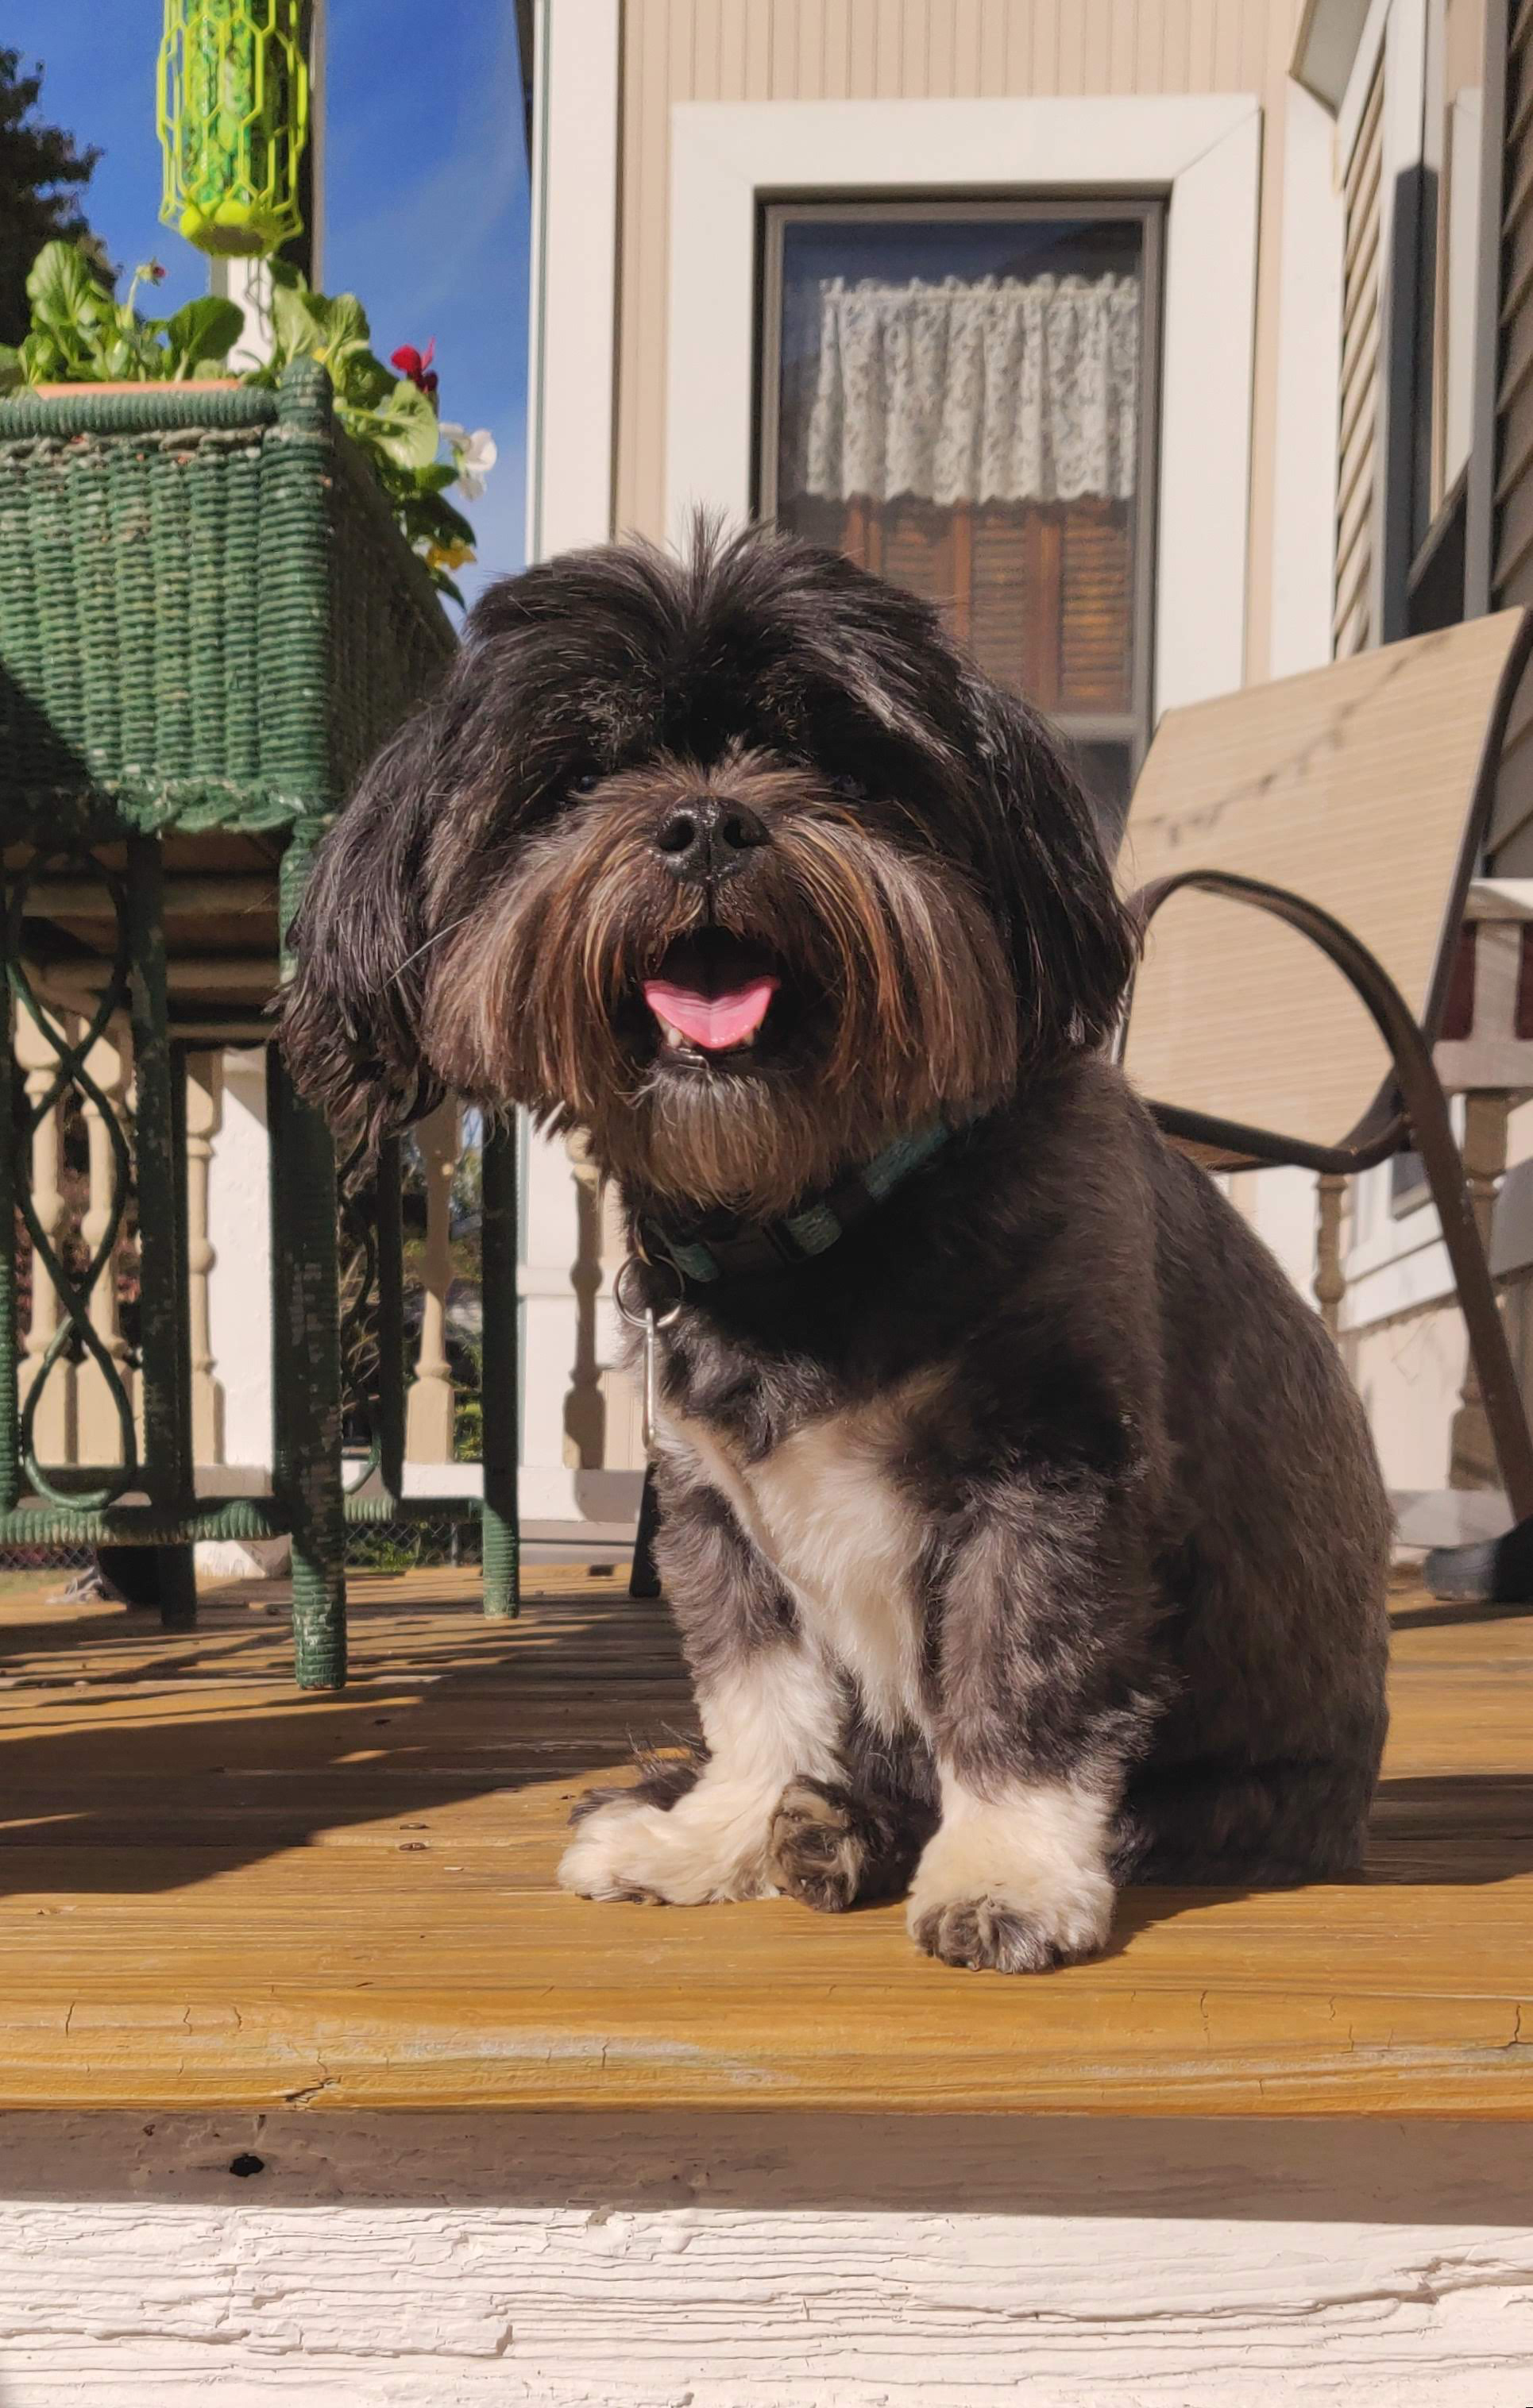

In [4]:
from PIL import Image
img = Image.open('/home/chrash/media/images/pictures/nina.jpg')
img = Image.open("../data/p1ch2/bobby.jpg")
img

In [5]:
img_t = preprocess(img)
img_t

tensor([[[-0.0972, -0.0116, -0.3541,  ..., -0.7822, -0.3369, -0.1657],
         [ 0.1254,  0.0056, -0.0458,  ..., -0.6794, -0.1486, -0.3883],
         [-0.2513, -0.4739, -0.3369,  ..., -0.4054, -0.1999, -0.7308],
         ...,
         [-0.9877, -1.0048, -1.0048,  ..., -0.6109, -0.6281, -0.6452],
         [-0.9877, -0.9877, -0.9877,  ..., -0.7137, -0.6965, -0.6965],
         [-0.9705, -0.9877, -1.0048,  ..., -0.6452, -0.6452, -0.6623]],

        [[ 0.0826,  0.0651, -0.1275,  ..., -0.7577, -0.3725, -0.2150],
         [ 0.3277,  0.1001,  0.2402,  ..., -0.6702, -0.1800, -0.4251],
         [ 0.0476, -0.1450,  0.0301,  ..., -0.4426, -0.2325, -0.7227],
         ...,
         [-1.1604, -1.1779, -1.1779,  ..., -0.8803, -0.8978, -0.9153],
         [-1.1604, -1.1604, -1.1604,  ..., -0.9853, -0.9678, -0.9678],
         [-1.1429, -1.1604, -1.1779,  ..., -0.9153, -0.9153, -0.9328]],

        [[-0.2010, -0.2707, -0.4624,  ..., -0.5670, -0.3404, -0.2184],
         [-0.0441, -0.2881, -0.1312,  ..., -0

In [6]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [7]:
# put the resnet network into eval mode
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
out = resnet(batch_t)
out

tensor([[-3.1917e+00, -2.2044e+00, -2.1590e+00, -2.0197e+00, -3.1347e+00,
         -2.5049e+00, -3.0872e+00,  3.9262e-01, -1.1520e+00,  1.6052e+00,
         -1.7667e+00, -1.9573e+00, -1.4928e+00, -9.8031e-01, -2.2233e+00,
         -1.3455e+00,  7.4463e-01,  1.3891e+00, -5.8738e-01, -9.7344e-01,
         -3.1815e+00, -7.7478e-01, -1.0693e+00, -2.3328e+00,  3.1346e-01,
         -3.6689e+00, -2.9785e+00, -2.0398e+00, -1.9713e+00, -1.8189e+00,
         -4.3408e+00, -2.6364e+00, -2.8108e+00, -3.0947e+00, -2.3202e+00,
         -1.9239e+00, -1.8201e+00, -2.0553e+00, -2.8858e+00, -1.8887e+00,
         -1.7848e+00,  4.1956e-01, -1.7195e+00, -1.3669e+00, -2.0385e+00,
         -1.4657e+00, -2.5125e+00, -1.4462e+00, -3.0882e+00, -2.1138e+00,
         -2.7726e+00,  1.1278e+00,  5.9951e-02, -1.4516e+00, -2.6377e+00,
         -6.9848e-01, -7.4121e-01, -1.9275e+00, -2.3841e+00,  2.6462e-02,
          8.8216e-01, -1.7938e+00, -3.2759e-01, -2.1772e+00, -1.8586e+00,
         -3.1649e+00, -1.2100e+00, -1.

In [9]:
# open file with labels
with open('../data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
# get the maximum output value
_, index = torch.max(out, 1)
index = index[0]
# get the label and the confidence
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

In [12]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('Lhasa, Lhasa apso', 44.273738861083984),
 ('Tibetan terrier, chrysanthemum dog', 32.67960739135742),
 ('Shih-Tzu', 10.486631393432617),
 ('affenpinscher, monkey pinscher, monkey dog', 7.624886989593506),
 ('Yorkshire terrier', 0.766231894493103)]

[('Lhasa, Lhasa apso', 44.273738861083984),
 ('Tibetan terrier, chrysanthemum dog', 32.67960739135742),
 ('Shih-Tzu', 10.486631393432617),
 ('affenpinscher, monkey pinscher, monkey dog', 7.624886989593506),
 ('Yorkshire terrier', 0.766231894493103)]